# Main Code

### Imports

In [1]:
import torch
from torch import nn
from torch import optim
from torch.nn import functional as F

import matplotlib.pyplot as plt
import dlc_practical_prologue as prologue

### Deep network architectures

In [2]:
# Neural Net with convolutions and without weight sharing (non-siamese) nor auxiliary loss
class NetBase(nn.Module):
    def __init__(self):
        super(NetBase, self).__init__()
        self.conv1_1 = nn.Conv2d(1, 32, kernel_size=3)
        self.conv1_2 = nn.Conv2d(1, 32, kernel_size=3)
        self.conv2_1 = nn.Conv2d(32, 64, kernel_size=3)
        self.conv2_2 = nn.Conv2d(32, 64, kernel_size=3)
        self.fc3_1 = nn.Linear(256, 128)
        self.fc3_2 = nn.Linear(256, 128)
        self.fc4_1 = nn.Linear(128, 10)
        self.fc4_2 = nn.Linear(128, 10)
        self.fc5 = nn.Linear(20, 128)
        self.fc6 = nn.Linear(128, 2)

    def forward(self, x):
        x1 = F.relu(F.max_pool2d(self.conv1_1(x[:, 0].view(-1, 1, 14, 14)), kernel_size=2, stride=2))
        x2 = F.relu(F.max_pool2d(self.conv1_2(x[:, 1].view(-1, 1, 14, 14)), kernel_size=2, stride=2))
        x1 = F.relu(F.max_pool2d(self.conv2_1(x1), kernel_size=2, stride=2))
        x2 = F.relu(F.max_pool2d(self.conv2_2(x2), kernel_size=2, stride=2))
        x1 = F.relu(self.fc3_1(x1.view(-1, 256)))
        x2 = F.relu(self.fc3_2(x2.view(-1, 256)))
        x1 = F.relu(self.fc4_1(x1))
        x2 = F.relu(self.fc4_2(x2))
        x = F.relu(self.fc5(torch.cat((x1, x2), 1)))
        x = self.fc6(x)
        return x, None, None
    
# Neural Net with convolutions and weight sharing (siamese) and without auxiliary loss
class NetWS(nn.Module):
    def __init__(self):
        super(NetWS, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3)
        self.fc3 = nn.Linear(256, 128)
        self.fc4 = nn.Linear(128, 10)
        self.fc5 = nn.Linear(20, 128)
        self.fc6 = nn.Linear(128, 2)

    def forward(self, x):
        x1 = F.relu(F.max_pool2d(self.conv1(x[:, 0].view(-1, 1, 14, 14)), kernel_size=2, stride=2))
        x2 = F.relu(F.max_pool2d(self.conv1(x[:, 1].view(-1, 1, 14, 14)), kernel_size=2, stride=2))
        x1 = F.relu(F.max_pool2d(self.conv2(x1), kernel_size=2, stride=2))
        x2 = F.relu(F.max_pool2d(self.conv2(x2), kernel_size=2, stride=2))
        x1 = F.relu(self.fc3(x1.view(-1, 256)))
        x2 = F.relu(self.fc3(x2.view(-1, 256)))
        x1 = F.relu(self.fc4(x1))
        x2 = F.relu(self.fc4(x2))
        x = F.relu(self.fc5(torch.cat((x1, x2), 1)))
        x = self.fc6(x)
        return x, None, None
    
# Neural Net with convolutions and auxiliary loss and without weight sharing (non-siamese)
class NetAL(nn.Module):
    def __init__(self):
        super(NetAL, self).__init__()
        self.conv1_1 = nn.Conv2d(1, 32, kernel_size=3)
        self.conv1_2 = nn.Conv2d(1, 32, kernel_size=3)
        self.conv2_1 = nn.Conv2d(32, 64, kernel_size=3)
        self.conv2_2 = nn.Conv2d(32, 64, kernel_size=3)
        self.fc3_1 = nn.Linear(256, 128)
        self.fc3_2 = nn.Linear(256, 128)
        self.fc4_1 = nn.Linear(128, 10)
        self.fc4_2 = nn.Linear(128, 10)
        self.fc5 = nn.Linear(20, 128)
        self.fc6 = nn.Linear(128, 2)

    def forward(self, x):
        x1 = F.relu(F.max_pool2d(self.conv1_1(x[:, 0].view(-1, 1, 14, 14)), kernel_size=2, stride=2))
        x2 = F.relu(F.max_pool2d(self.conv1_2(x[:, 1].view(-1, 1, 14, 14)), kernel_size=2, stride=2))
        x1 = F.relu(F.max_pool2d(self.conv2_1(x1), kernel_size=2, stride=2))
        x2 = F.relu(F.max_pool2d(self.conv2_2(x2), kernel_size=2, stride=2))
        x1 = F.relu(self.fc3_1(x1.view(-1, 256)))
        x2 = F.relu(self.fc3_2(x2.view(-1, 256)))
        x1_aux = self.fc4_1(x1)
        x2_aux = self.fc4_2(x2)
        x1 = F.relu(x1_aux)
        x2 = F.relu(x2_aux)
        x = F.relu(self.fc5(torch.cat((x1, x2), 1)))
        x = self.fc6(x)
        return x, x1_aux, x2_aux
    
# Neural Net with convolutions and both weight sharing (siamese) and auxiliary loss
class NetWSAL(nn.Module):
    def __init__(self):
        super(NetWSAL, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3)
        self.fc3 = nn.Linear(256, 128)
        self.fc4 = nn.Linear(128, 10)
        self.fc5 = nn.Linear(20, 128)
        self.fc6 = nn.Linear(128, 2)

    def forward(self, x):
        x1 = F.relu(F.max_pool2d(self.conv1(x[:, 0].view(-1, 1, 14, 14)), kernel_size=2, stride=2))
        x2 = F.relu(F.max_pool2d(self.conv1(x[:, 1].view(-1, 1, 14, 14)), kernel_size=2, stride=2))
        x1 = F.relu(F.max_pool2d(self.conv2(x1), kernel_size=2, stride=2))
        x2 = F.relu(F.max_pool2d(self.conv2(x2), kernel_size=2, stride=2))
        x1 = F.relu(self.fc3(x1.view(-1, 256)))
        x2 = F.relu(self.fc3(x2.view(-1, 256)))
        x1_aux = self.fc4(x1)
        x2_aux = self.fc4(x2)
        x1 = F.relu(x1_aux)
        x2 = F.relu(x2_aux)
        x = F.relu(self.fc5(torch.cat((x1, x2), 1)))
        x = self.fc6(x)
        return x, x1_aux, x2_aux

### Functions

In [3]:
def train_model(model, train_input, train_target, train_classes, criterion, optimizer, mini_batch_size, nb_epochs):
    for e in range(nb_epochs):
        for b in range(0, train_input.size(0), mini_batch_size):
            output_main, output_aux1, output_aux2 = model(train_input.narrow(0, b, mini_batch_size))
            if (output_aux1 is None and output_aux2 is None):
                loss = criterion(output_main, train_target.narrow(0, b, mini_batch_size))
            elif (output_aux1 is not None and output_aux2 is not None):
                loss_main = criterion(output_main, train_target.narrow(0, b, mini_batch_size))
                loss_aux1 = criterion(output_aux1, train_classes[:, 0].narrow(0, b, mini_batch_size))
                loss_aux2 = criterion(output_aux2, train_classes[:, 1].narrow(0, b, mini_batch_size))
                loss = loss_main + loss_aux1 + loss_aux2
            else:
                sys.exit("One of the two auxiliary losses is None while the other is not")
            model.zero_grad()
            loss.backward()
            optimizer.step()

In [4]:
def compute_nb_errors(model, test_input, test_target, test_classes, mini_batch_size):
    nb_target_errors = 0
    nb_digit_errors = 0
    nb_classes_errors = 0
    classes_bool = False
    for b in range(0, test_input.size(0), mini_batch_size):
        output_main, output_aux1, output_aux2 = model(test_input.narrow(0, b, mini_batch_size))
        if output_aux1 is None and output_aux2 is None:
            highest_numbers_indices_main = output_main.max(1)[1]
            for i in range(highest_numbers_indices_main.size(0)):
                if highest_numbers_indices_main[i] != test_target[b + i]:
                    nb_target_errors += 1
        elif output_aux1 is not None and output_aux2 is not None:
            if not classes_bool:
                classes_bool = True
            highest_numbers_indices_main = output_main.max(1)[1]
            highest_numbers_indices_aux1 = output_aux1.max(1)[1]
            highest_numbers_indices_aux2 = output_aux2.max(1)[1]
            for i in range(highest_numbers_indices_main.size(0)):
                if highest_numbers_indices_main[i] != test_target[b + i]:
                    nb_target_errors += 1
                first_digit_err = False
                second_digit_err = False
                if highest_numbers_indices_aux1[i] != test_classes[b + i][0]:
                    nb_digit_errors += 1
                    first_digit_err = True
                if highest_numbers_indices_aux2[i] != test_classes[b + i][1]:
                    nb_digit_errors += 1
                    second_digit_err = True
                if first_digit_err or second_digit_err:
                    nb_classes_errors += 1
        else:
            sys.exit("One of the two auxiliary losses is None while the other is not")
    if classes_bool:
        return nb_target_errors, nb_digit_errors, nb_classes_errors
    else:
        return nb_target_errors, None, None

In [5]:
def get_stats(model, optimizer, criterion, mini_batch_size, nb_epochs,
              train_input, train_target, train_classes, test_input, test_target, test_classes):
    print('Training ' + mod.__class__.__name__ + '...')
    
    train_model(model, train_input, train_target, train_classes, criterion, optimizer, mini_batch_size, nb_epochs)

    nb_target_errors, nb_digit_errors, nb_classes_errors = compute_nb_errors(
        model, test_input, test_target, test_classes, mini_batch_size)
    
    target_error_rate = nb_target_errors / test_target.size(0) * 100
    digit_error_rate = -1
    classes_error_rate = -1
    if nb_digit_errors is not None and nb_classes_errors is not None:
        digit_error_rate = (nb_digit_errors / (test_classes.size(0) * test_classes.size(1))) * 100
        classes_error_rate = nb_classes_errors / test_classes.size(0) * 100

    if digit_error_rate == -1 and classes_error_rate == -1:
        print('Target error rate is {:d} out of {:d} ({:.02f}%)'.format(
            nb_target_errors, test_target.size(0), target_error_rate))
    else:
        print('Target error rate is {:d} out of {:d} ({:.02f}%)'.format(
            nb_target_errors, test_target.size(0), target_error_rate))
        print('Classes error rate is {:d} out of {:d} ({:.02f}%) with {:d} out of {:d} digit errors in total ({:.02f}%)'.format(
            nb_classes_errors, test_classes.size(0), classes_error_rate, 
            nb_digit_errors, test_classes.size(0) * test_classes.size(1), digit_error_rate))
        
    return target_error_rate

### Execution of algorithm (all architectures)

Starting round 1
Training NetBase...
Target error rate is 178 out of 1000 (17.80%)
Training NetWS...
Target error rate is 144 out of 1000 (14.40%)
Training NetAL...
Target error rate is 54 out of 1000 (5.40%)
Classes error rate is 116 out of 1000 (11.60%) with 118 out of 2000 digit errors in total (5.90%)
Training NetWSAL...
Target error rate is 66 out of 1000 (6.60%)
Classes error rate is 90 out of 1000 (9.00%) with 91 out of 2000 digit errors in total (4.55%)
Round 1 done
Starting round 2
Training NetBase...
Target error rate is 172 out of 1000 (17.20%)
Training NetWS...
Target error rate is 158 out of 1000 (15.80%)
Training NetAL...
Target error rate is 84 out of 1000 (8.40%)
Classes error rate is 111 out of 1000 (11.10%) with 116 out of 2000 digit errors in total (5.80%)
Training NetWSAL...
Target error rate is 52 out of 1000 (5.20%)
Classes error rate is 69 out of 1000 (6.90%) with 72 out of 2000 digit errors in total (3.60%)
Round 2 done
Starting round 3
Training NetBase...
Targe

Target error rate is 142 out of 1000 (14.20%)
Training NetAL...
Target error rate is 72 out of 1000 (7.20%)
Classes error rate is 93 out of 1000 (9.30%) with 95 out of 2000 digit errors in total (4.75%)
Training NetWSAL...
Target error rate is 59 out of 1000 (5.90%)
Classes error rate is 78 out of 1000 (7.80%) with 78 out of 2000 digit errors in total (3.90%)
Round 18 done
Starting round 19
Training NetBase...
Target error rate is 343 out of 1000 (34.30%)
Training NetWS...
Target error rate is 142 out of 1000 (14.20%)
Training NetAL...
Target error rate is 62 out of 1000 (6.20%)
Classes error rate is 87 out of 1000 (8.70%) with 89 out of 2000 digit errors in total (4.45%)
Training NetWSAL...
Target error rate is 56 out of 1000 (5.60%)
Classes error rate is 72 out of 1000 (7.20%) with 72 out of 2000 digit errors in total (3.60%)
Round 19 done
Starting round 20
Training NetBase...
Target error rate is 187 out of 1000 (18.70%)
Training NetWS...
Target error rate is 163 out of 1000 (16.30%

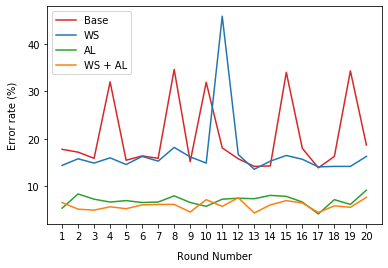

Mean of error rates for each model is : 
- NetBase : 20.4999980927
- NetWS   : 16.9500007629
- NetAL   : 7.0099997520
- NetWSAL : 5.9600000381

Standard Deviation of error rates for each model is : 
- NetBase : 7.7486162186
- NetWS   : 6.8812866211
- NetAL   : 1.1125599146
- NetWSAL : 0.9670355916



In [6]:
# Adam with learning rate 0.001 (default) ; batch size 25 ; number of epochs 100 ; 20 ROUNDS
torch.manual_seed(0)

# Setting the number of rounds and models
nb_rounds = 20
nb_models = 4

# Setting the hyperparameters
criterion = nn.CrossEntropyLoss()
mini_batch_size = 25
nb_epochs = 100

# Creating the 2D tensor of recorded error rates
test_errors = torch.zeros(nb_models, nb_rounds)

# Setting x-axis and y-axis of the plot
fig = plt.figure()
sub_plt = fig.add_subplot(1, 1, 1)
sub_plt.set_xlabel('Round Number', labelpad=10)
sub_plt.set_ylabel('Error rate (%)', labelpad=10)
sub_plt.set_yscale('linear')

# Executing computation
for j in range(nb_rounds):
    
    print('Starting round {:d}'.format(j + 1))

    # Generate train and test data sets with 1000 samples
    nb_samples = 1000
    train_input, train_target, train_classes, test_input, test_target, test_classes = prologue.generate_pair_sets(nb_samples)
    
    # Setting graph parameters
    graph_param = [
        (0, NetBase()),
        (1, NetWS()),
        (2, NetAL()),
        (3, NetWSAL()),
    ]

    # Loop to compute loss for each model
    for i, mod in graph_param:
        optimizer = optim.Adam(mod.parameters())
        test_error = get_stats(mod, optimizer, criterion, mini_batch_size, nb_epochs,
                               train_input, train_target, train_classes, test_input, test_target, test_classes)
        test_errors[i][j] = test_error
        
    print('Round {:d} done'.format(j + 1))

# Setting colors and labels
colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange']
labels = ['Base', 'WS', 'AL', 'WS + AL']

# Plotting accuracy
for i in range(nb_models):
    sub_plt.plot(range(1, nb_rounds + 1), test_errors[i], color=colors[i], label=labels[i])

# Including legend to the plot
sub_plt.legend()

# Formatting x-axis and displaying plot
plt.xticks(range(1, nb_rounds + 1))
plt.show()

# Printing mean and standard deviation of each model test error rates
nets = ['NetBase', 'NetWS  ', 'NetAL  ', 'NetWSAL']
print('Mean of error rates for each model is : \n' + ''.join(
    '- {} : {:.10f}\n'.format(net_name, mean_err) for net_name, mean_err in zip(nets, test_errors.mean(1))))
print('Standard Deviation of error rates for each model is : \n' + ''.join(
    '- {} : {:.10f}\n'.format(net_name, std_err) for net_name, std_err in zip(nets, test_errors.std(1))))

# Grid Searches

### On NetBase [(Batch Size, Epochs Number) Fixed : (25, 100)]

Starting round 1 for learning rate 0.001
Computing for SGD...
Training NetBase...
Target error rate is 179 out of 1000 (17.90%)
Computing for Adam...
Training NetBase...
Target error rate is 138 out of 1000 (13.80%)
Computing for Adadelta...
Training NetBase...
Target error rate is 210 out of 1000 (21.00%)
Computing for Adagrad...
Training NetBase...
Target error rate is 149 out of 1000 (14.90%)
Computing for RMSprop...
Training NetBase...
Target error rate is 301 out of 1000 (30.10%)
Round 1 for learning rate 0.001 done
Starting round 2 for learning rate 0.001
Computing for SGD...
Training NetBase...
Target error rate is 184 out of 1000 (18.40%)
Computing for Adam...
Training NetBase...
Target error rate is 186 out of 1000 (18.60%)
Computing for Adadelta...
Training NetBase...
Target error rate is 205 out of 1000 (20.50%)
Computing for Adagrad...
Training NetBase...
Target error rate is 179 out of 1000 (17.90%)
Computing for RMSprop...
Training NetBase...
Target error rate is 174 out 

Target error rate is 442 out of 1000 (44.20%)
Computing for RMSprop...
Training NetBase...
Target error rate is 193 out of 1000 (19.30%)
Round 6 for learning rate 0.005 done
Starting round 7 for learning rate 0.005
Computing for SGD...
Training NetBase...
Target error rate is 181 out of 1000 (18.10%)
Computing for Adam...
Training NetBase...
Target error rate is 182 out of 1000 (18.20%)
Computing for Adadelta...
Training NetBase...
Target error rate is 181 out of 1000 (18.10%)
Computing for Adagrad...
Training NetBase...
Target error rate is 341 out of 1000 (34.10%)
Computing for RMSprop...
Training NetBase...
Target error rate is 438 out of 1000 (43.80%)
Round 7 for learning rate 0.005 done
Starting round 8 for learning rate 0.005
Computing for SGD...
Training NetBase...
Target error rate is 166 out of 1000 (16.60%)
Computing for Adam...
Training NetBase...
Target error rate is 346 out of 1000 (34.60%)
Computing for Adadelta...
Training NetBase...
Target error rate is 218 out of 1000 

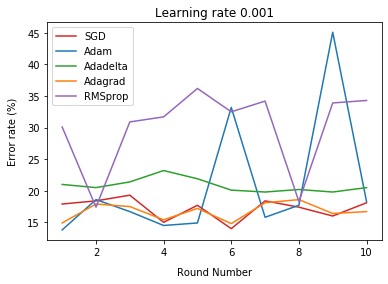

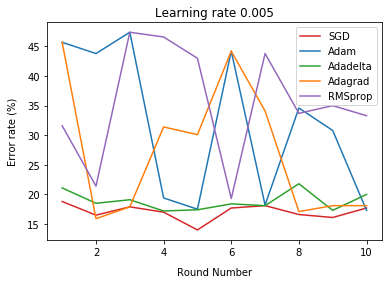

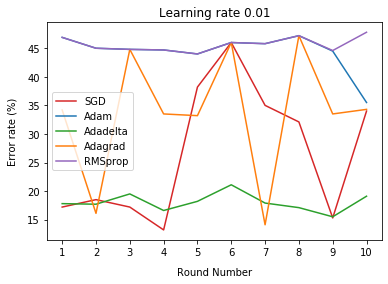

Mean error rate for lr=0.001 : 
- SGD : 17.220
- Adam : 20.860
- Adadelta : 20.840
- Adagrad : 16.750
- RMSprop : 29.950
Mean error rate for lr=0.005 : 
- SGD : 17.040
- Adam : 31.890
- Adadelta : 18.890
- Adagrad : 27.260
- RMSprop : 35.510
Mean error rate for lr=0.01 : 
- SGD : 26.670
- Adam : 44.440
- Adadelta : 18.050
- Adagrad : 33.690
- RMSprop : 45.680


In [6]:
torch.manual_seed(0)

# Setting the number of rounds, optimizers and parameters to test
nb_rounds = 10
nb_param = 3
nb_optim = 5

# Setting the list of learning rates to test
learning_rates = [0.001, 0.005, 0.01]

# Setting the hyperparameters
criterion = nn.CrossEntropyLoss()
mini_batch_size = 25
nb_epochs = 100

# Creating the 2D tensor of recorded error rates
test_errors = torch.zeros(nb_optim, nb_param, nb_rounds)

# Setting x-axis and y-axis of the first plot
fig1 = plt.figure()
sub_plt1 = fig1.add_subplot(1, 1, 1)
sub_plt1.set_xlabel('Round Number', labelpad=10)
sub_plt1.set_ylabel('Error rate (%)', labelpad=10)
sub_plt1.set_yscale('linear')
sub_plt1.set_title('Learning rate 0.001')

# Setting x-axis and y-axis of the second plot
fig2 = plt.figure()
sub_plt2 = fig2.add_subplot(1, 1, 1)
sub_plt2.set_xlabel('Round Number', labelpad=10)
sub_plt2.set_ylabel('Error rate (%)', labelpad=10)
sub_plt2.set_yscale('linear')
sub_plt2.set_title('Learning rate 0.005')

# Setting x-axis and y-axis of the third plot
fig3 = plt.figure()
sub_plt3 = fig3.add_subplot(1, 1, 1)
sub_plt3.set_xlabel('Round Number', labelpad=10)
sub_plt3.set_ylabel('Error rate (%)', labelpad=10)
sub_plt3.set_yscale('linear')
sub_plt3.set_title('Learning rate 0.01')

# Starting Mini Grid Search
for k in range(nb_param):
    
    # Setting the current learning rate
    lr = learning_rates[k]
    
    # Executing Next Round
    for j in range(nb_rounds):

        print('Starting round {:d} for learning rate {:.03f}'.format(j + 1, lr))

        # Generate train and test data sets with 1000 samples
        nb_samples = 1000
        train_input, train_target, train_classes, test_input, test_target, test_classes = prologue.generate_pair_sets(
            nb_samples)

        # Setting graph parameters
        graph_param = [
            (0, NetBase(), 'SGD'),
            (1, NetBase(), 'Adam'),
            (2, NetBase(), 'Adadelta'),
            (3, NetBase(), 'Adagrad'),
            (4, NetBase(), 'RMSprop'),
        ]

        # Loop to compute loss for each model
        for i, mod, name in graph_param:
            
            if name == 'SGD':
                print('Computing for SGD...')
                optimizer = optim.SGD(mod.parameters(), lr=lr)
                test_error = get_stats(mod, optimizer, criterion, mini_batch_size, nb_epochs,
                                       train_input, train_target, train_classes, test_input, test_target, test_classes)
                test_errors[i][k][j] = test_error
                
            elif name == 'Adam':
                print('Computing for Adam...')
                optimizer = optim.Adam(mod.parameters(), lr=lr)
                test_error = get_stats(mod, optimizer, criterion, mini_batch_size, nb_epochs,
                                       train_input, train_target, train_classes, test_input, test_target, test_classes)
                test_errors[i][k][j] = test_error
                
            elif name == 'Adadelta':
                print('Computing for Adadelta...')
                optimizer = optim.Adadelta(mod.parameters(), lr=lr)
                test_error = get_stats(mod, optimizer, criterion, mini_batch_size, nb_epochs,
                                       train_input, train_target, train_classes, test_input, test_target, test_classes)
                test_errors[i][k][j] = test_error
                
            elif name == 'Adagrad':
                print('Computing for Adagrad...')
                optimizer = optim.Adagrad(mod.parameters(), lr=lr)
                test_error = get_stats(mod, optimizer, criterion, mini_batch_size, nb_epochs,
                                       train_input, train_target, train_classes, test_input, test_target, test_classes)
                test_errors[i][k][j] = test_error
                
            elif name == 'RMSprop':
                print('Computing for RMSprop...')
                optimizer = optim.RMSprop(mod.parameters(), lr=lr)
                test_error = get_stats(mod, optimizer, criterion, mini_batch_size, nb_epochs,
                                       train_input, train_target, train_classes, test_input, test_target, test_classes)
                test_errors[i][k][j] = test_error

        print('Round {:d} for learning rate {:.03f} done'.format(j + 1, lr))

# Setting colors and labels
colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange', 'tab:purple']
labels = ['SGD', 'Adam', 'Adadelta', 'Adagrad', 'RMSprop']

# Plotting accuracy
for i in range(nb_optim):
    sub_plt1.plot(range(1, nb_rounds + 1), test_errors[i][0], color=colors[i], label=labels[i])
    sub_plt2.plot(range(1, nb_rounds + 1), test_errors[i][1], color=colors[i], label=labels[i])
    sub_plt3.plot(range(1, nb_rounds + 1), test_errors[i][2], color=colors[i], label=labels[i])

# Including legend to the plots
sub_plt1.legend()
sub_plt2.legend()
sub_plt3.legend()

# Formatting x-axis and displaying plot
plt.xticks(range(1, nb_rounds + 1))
plt.show()

for j in range(nb_param):
    print('Mean error rate for lr=' + str(learning_rates[j]) + ' : ')
    for i in range(nb_optim):
        print('- ' + str(labels[i]) + ' : ' + '{:.03f}'.format(test_errors[i][j].mean(0)))

### On NetWS [Batch Size & Epochs Number Fixed : (25, 100)]

Starting round 1 for learning rate 0.001
Computing for SGD...
Training NetWS...
Target error rate is 156 out of 1000 (15.60%)
Computing for Adam...
Training NetWS...
Target error rate is 140 out of 1000 (14.00%)
Computing for Adadelta...
Training NetWS...
Target error rate is 204 out of 1000 (20.40%)
Computing for Adagrad...
Training NetWS...
Target error rate is 168 out of 1000 (16.80%)
Computing for RMSprop...
Training NetWS...
Target error rate is 474 out of 1000 (47.40%)
Round 1 for learning rate 0.001 done
Starting round 2 for learning rate 0.001
Computing for SGD...
Training NetWS...
Target error rate is 140 out of 1000 (14.00%)
Computing for Adam...
Training NetWS...
Target error rate is 149 out of 1000 (14.90%)
Computing for Adadelta...
Training NetWS...
Target error rate is 195 out of 1000 (19.50%)
Computing for Adagrad...
Training NetWS...
Target error rate is 142 out of 1000 (14.20%)
Computing for RMSprop...
Training NetWS...
Target error rate is 155 out of 1000 (15.50%)
Rou

Computing for SGD...
Training NetWS...
Target error rate is 175 out of 1000 (17.50%)
Computing for Adam...
Training NetWS...
Target error rate is 435 out of 1000 (43.50%)
Computing for Adadelta...
Training NetWS...
Target error rate is 185 out of 1000 (18.50%)
Computing for Adagrad...
Training NetWS...
Target error rate is 435 out of 1000 (43.50%)
Computing for RMSprop...
Training NetWS...
Target error rate is 435 out of 1000 (43.50%)
Round 7 for learning rate 0.005 done
Starting round 8 for learning rate 0.005
Computing for SGD...
Training NetWS...
Target error rate is 158 out of 1000 (15.80%)
Computing for Adam...
Training NetWS...
Target error rate is 428 out of 1000 (42.80%)
Computing for Adadelta...
Training NetWS...
Target error rate is 152 out of 1000 (15.20%)
Computing for Adagrad...
Training NetWS...
Target error rate is 428 out of 1000 (42.80%)
Computing for RMSprop...
Training NetWS...
Target error rate is 428 out of 1000 (42.80%)
Round 8 for learning rate 0.005 done
Startin

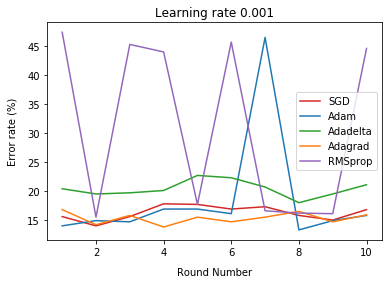

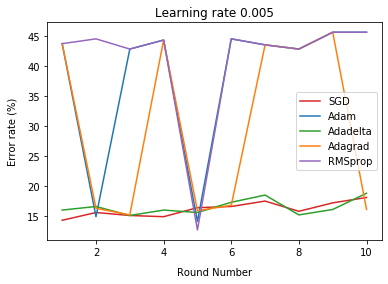

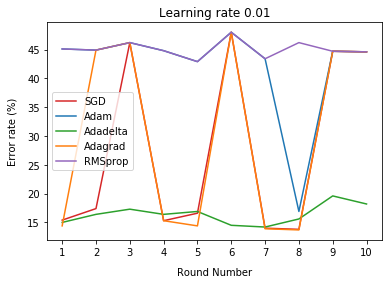

Mean error rate for lr=0.001 : 
- SGD : 16.250
- Adam : 18.400
- Adadelta : 20.400
- Adagrad : 15.340
- RMSprop : 30.910
Mean error rate for lr=0.005 : 
- SGD : 16.150
- Adam : 38.180
- Adadelta : 16.520
- Adagrad : 30.020
- RMSprop : 41.000
Mean error rate for lr=0.01 : 
- SGD : 27.600
- Adam : 42.150
- Adadelta : 16.410
- Adagrad : 30.010
- RMSprop : 45.080


In [6]:
torch.manual_seed(0)

# Setting the number of rounds, optimizers and parameters to test
nb_rounds = 10
nb_param = 3
nb_optim = 5

# Setting the list of learning rates to test
learning_rates = [0.001, 0.005, 0.01]

# Setting the hyperparameters
criterion = nn.CrossEntropyLoss()
mini_batch_size = 25
nb_epochs = 100

# Creating the 2D tensor of recorded error rates
test_errors = torch.zeros(nb_optim, nb_param, nb_rounds)

# Setting x-axis and y-axis of the first plot
fig1 = plt.figure()
sub_plt1 = fig1.add_subplot(1, 1, 1)
sub_plt1.set_xlabel('Round Number', labelpad=10)
sub_plt1.set_ylabel('Error rate (%)', labelpad=10)
sub_plt1.set_yscale('linear')
sub_plt1.set_title('Learning rate 0.001')

# Setting x-axis and y-axis of the second plot
fig2 = plt.figure()
sub_plt2 = fig2.add_subplot(1, 1, 1)
sub_plt2.set_xlabel('Round Number', labelpad=10)
sub_plt2.set_ylabel('Error rate (%)', labelpad=10)
sub_plt2.set_yscale('linear')
sub_plt2.set_title('Learning rate 0.005')

# Setting x-axis and y-axis of the third plot
fig3 = plt.figure()
sub_plt3 = fig3.add_subplot(1, 1, 1)
sub_plt3.set_xlabel('Round Number', labelpad=10)
sub_plt3.set_ylabel('Error rate (%)', labelpad=10)
sub_plt3.set_yscale('linear')
sub_plt3.set_title('Learning rate 0.01')

# Starting Mini Grid Search
for k in range(nb_param):
    
    # Setting the current learning rate
    lr = learning_rates[k]
    
    # Executing Next Round
    for j in range(nb_rounds):

        print('Starting round {:d} for learning rate {:.03f}'.format(j + 1, lr))

        # Generate train and test data sets with 1000 samples
        nb_samples = 1000
        train_input, train_target, train_classes, test_input, test_target, test_classes = prologue.generate_pair_sets(
            nb_samples)

        # Setting graph parameters
        graph_param = [
            (0, NetWS(), 'SGD'),
            (1, NetWS(), 'Adam'),
            (2, NetWS(), 'Adadelta'),
            (3, NetWS(), 'Adagrad'),
            (4, NetWS(), 'RMSprop'),
        ]

        # Loop to compute loss for each model
        for i, mod, name in graph_param:
            
            if name == 'SGD':
                print('Computing for SGD...')
                optimizer = optim.SGD(mod.parameters(), lr=lr)
                test_error = get_stats(mod, optimizer, criterion, mini_batch_size, nb_epochs,
                                       train_input, train_target, train_classes, test_input, test_target, test_classes)
                test_errors[i][k][j] = test_error
                
            elif name == 'Adam':
                print('Computing for Adam...')
                optimizer = optim.Adam(mod.parameters(), lr=lr)
                test_error = get_stats(mod, optimizer, criterion, mini_batch_size, nb_epochs,
                                       train_input, train_target, train_classes, test_input, test_target, test_classes)
                test_errors[i][k][j] = test_error
                
            elif name == 'Adadelta':
                print('Computing for Adadelta...')
                optimizer = optim.Adadelta(mod.parameters(), lr=lr)
                test_error = get_stats(mod, optimizer, criterion, mini_batch_size, nb_epochs,
                                       train_input, train_target, train_classes, test_input, test_target, test_classes)
                test_errors[i][k][j] = test_error
                
            elif name == 'Adagrad':
                print('Computing for Adagrad...')
                optimizer = optim.Adagrad(mod.parameters(), lr=lr)
                test_error = get_stats(mod, optimizer, criterion, mini_batch_size, nb_epochs,
                                       train_input, train_target, train_classes, test_input, test_target, test_classes)
                test_errors[i][k][j] = test_error
                
            elif name == 'RMSprop':
                print('Computing for RMSprop...')
                optimizer = optim.RMSprop(mod.parameters(), lr=lr)
                test_error = get_stats(mod, optimizer, criterion, mini_batch_size, nb_epochs,
                                       train_input, train_target, train_classes, test_input, test_target, test_classes)
                test_errors[i][k][j] = test_error

        print('Round {:d} for learning rate {:.03f} done'.format(j + 1, lr))

# Setting colors and labels
colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange', 'tab:purple']
labels = ['SGD', 'Adam', 'Adadelta', 'Adagrad', 'RMSprop']

# Plotting accuracy
for i in range(nb_optim):
    sub_plt1.plot(range(1, nb_rounds + 1), test_errors[i][0], color=colors[i], label=labels[i])
    sub_plt2.plot(range(1, nb_rounds + 1), test_errors[i][1], color=colors[i], label=labels[i])
    sub_plt3.plot(range(1, nb_rounds + 1), test_errors[i][2], color=colors[i], label=labels[i])

# Including legend to the plots
sub_plt1.legend()
sub_plt2.legend()
sub_plt3.legend()

# Formatting x-axis and displaying plot
plt.xticks(range(1, nb_rounds + 1))
plt.show()

for j in range(nb_param):
    print('Mean error rate for lr=' + str(learning_rates[j]) + ' : ')
    for i in range(nb_optim):
        print('- ' + str(labels[i]) + ' : ' + '{:.03f}'.format(test_errors[i][j].mean(0)))

### On NetAL [Batch Size & Epochs Number Fixed : (25, 100)]

Starting round 1 for learning rate 0.001
Computing for SGD...
Training NetAL...
Target error rate is 135 out of 1000 (13.50%)
Classes error rate is 169 out of 1000 (16.90%) with 175 out of 2000 digit errors in total (8.75%)
Computing for Adam...
Training NetAL...
Target error rate is 74 out of 1000 (7.40%)
Classes error rate is 116 out of 1000 (11.60%) with 119 out of 2000 digit errors in total (5.95%)
Computing for Adadelta...
Training NetAL...
Target error rate is 389 out of 1000 (38.90%)
Classes error rate is 422 out of 1000 (42.20%) with 490 out of 2000 digit errors in total (24.50%)
Computing for Adagrad...
Training NetAL...
Target error rate is 128 out of 1000 (12.80%)
Classes error rate is 170 out of 1000 (17.00%) with 174 out of 2000 digit errors in total (8.70%)
Computing for RMSprop...
Training NetAL...
Target error rate is 66 out of 1000 (6.60%)
Classes error rate is 148 out of 1000 (14.80%) with 153 out of 2000 digit errors in total (7.65%)
Round 1 for learning rate 0.001 d

Target error rate is 99 out of 1000 (9.90%)
Classes error rate is 229 out of 1000 (22.90%) with 243 out of 2000 digit errors in total (12.15%)
Computing for Adadelta...
Training NetAL...
Target error rate is 174 out of 1000 (17.40%)
Classes error rate is 192 out of 1000 (19.20%) with 203 out of 2000 digit errors in total (10.15%)
Computing for Adagrad...
Training NetAL...
Target error rate is 129 out of 1000 (12.90%)
Classes error rate is 155 out of 1000 (15.50%) with 165 out of 2000 digit errors in total (8.25%)
Computing for RMSprop...
Training NetAL...
Target error rate is 56 out of 1000 (5.60%)
Classes error rate is 159 out of 1000 (15.90%) with 169 out of 2000 digit errors in total (8.45%)
Round 7 for learning rate 0.005 done
Starting round 8 for learning rate 0.005
Computing for SGD...
Training NetAL...
Target error rate is 117 out of 1000 (11.70%)
Classes error rate is 129 out of 1000 (12.90%) with 131 out of 2000 digit errors in total (6.55%)
Computing for Adam...
Training NetA

Computing for Adadelta...
Training NetAL...
Target error rate is 145 out of 1000 (14.50%)
Classes error rate is 170 out of 1000 (17.00%) with 177 out of 2000 digit errors in total (8.85%)
Computing for Adagrad...
Training NetAL...
Target error rate is 106 out of 1000 (10.60%)
Classes error rate is 107 out of 1000 (10.70%) with 110 out of 2000 digit errors in total (5.50%)
Computing for RMSprop...
Training NetAL...
Target error rate is 83 out of 1000 (8.30%)
Classes error rate is 200 out of 1000 (20.00%) with 213 out of 2000 digit errors in total (10.65%)
Round 5 for learning rate 0.010 done
Starting round 6 for learning rate 0.010
Computing for SGD...
Training NetAL...
Target error rate is 540 out of 1000 (54.00%)
Classes error rate is 987 out of 1000 (98.70%) with 1826 out of 2000 digit errors in total (91.30%)
Computing for Adam...
Training NetAL...
Target error rate is 119 out of 1000 (11.90%)
Classes error rate is 320 out of 1000 (32.00%) with 348 out of 2000 digit errors in total 

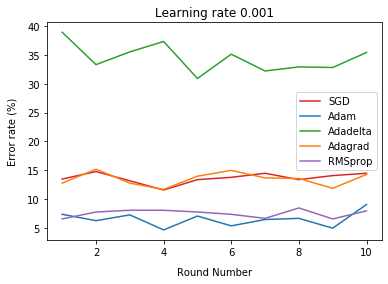

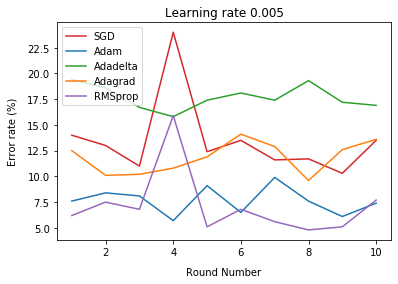

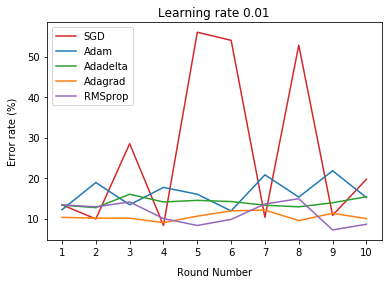

Mean error rate for lr=0.001 : 
- SGD : 13.680
- Adam : 6.550
- Adadelta : 34.430
- Adagrad : 13.500
- RMSprop : 7.560
Mean error rate for lr=0.005 : 
- SGD : 13.500
- Adam : 7.640
- Adadelta : 17.680
- Adagrad : 11.830
- RMSprop : 7.150
Mean error rate for lr=0.01 : 
- SGD : 26.370
- Adam : 16.320
- Adadelta : 14.030
- Adagrad : 10.490
- RMSprop : 11.280


In [6]:
torch.manual_seed(0)

# Setting the number of rounds, optimizers and parameters to test
nb_rounds = 10
nb_param = 3
nb_optim = 5

# Setting the list of learning rates to test
learning_rates = [0.001, 0.005, 0.01]

# Setting the hyperparameters
criterion = nn.CrossEntropyLoss()
mini_batch_size = 25
nb_epochs = 100

# Creating the 2D tensor of recorded error rates
test_errors = torch.zeros(nb_optim, nb_param, nb_rounds)

# Setting x-axis and y-axis of the first plot
fig1 = plt.figure()
sub_plt1 = fig1.add_subplot(1, 1, 1)
sub_plt1.set_xlabel('Round Number', labelpad=10)
sub_plt1.set_ylabel('Error rate (%)', labelpad=10)
sub_plt1.set_yscale('linear')
sub_plt1.set_title('Learning rate 0.001')

# Setting x-axis and y-axis of the second plot
fig2 = plt.figure()
sub_plt2 = fig2.add_subplot(1, 1, 1)
sub_plt2.set_xlabel('Round Number', labelpad=10)
sub_plt2.set_ylabel('Error rate (%)', labelpad=10)
sub_plt2.set_yscale('linear')
sub_plt2.set_title('Learning rate 0.005')

# Setting x-axis and y-axis of the third plot
fig3 = plt.figure()
sub_plt3 = fig3.add_subplot(1, 1, 1)
sub_plt3.set_xlabel('Round Number', labelpad=10)
sub_plt3.set_ylabel('Error rate (%)', labelpad=10)
sub_plt3.set_yscale('linear')
sub_plt3.set_title('Learning rate 0.01')

# Starting Mini Grid Search
for k in range(nb_param):
    
    # Setting the current learning rate
    lr = learning_rates[k]
    
    # Executing Next Round
    for j in range(nb_rounds):

        print('Starting round {:d} for learning rate {:.03f}'.format(j + 1, lr))

        # Generate train and test data sets with 1000 samples
        nb_samples = 1000
        train_input, train_target, train_classes, test_input, test_target, test_classes = prologue.generate_pair_sets(
            nb_samples)

        # Setting graph parameters
        graph_param = [
            (0, NetAL(), 'SGD'),
            (1, NetAL(), 'Adam'),
            (2, NetAL(), 'Adadelta'),
            (3, NetAL(), 'Adagrad'),
            (4, NetAL(), 'RMSprop'),
        ]

        # Loop to compute loss for each model
        for i, mod, name in graph_param:
            
            if name == 'SGD':
                print('Computing for SGD...')
                optimizer = optim.SGD(mod.parameters(), lr=lr)
                test_error = get_stats(mod, optimizer, criterion, mini_batch_size, nb_epochs,
                                       train_input, train_target, train_classes, test_input, test_target, test_classes)
                test_errors[i][k][j] = test_error
                
            elif name == 'Adam':
                print('Computing for Adam...')
                optimizer = optim.Adam(mod.parameters(), lr=lr)
                test_error = get_stats(mod, optimizer, criterion, mini_batch_size, nb_epochs,
                                       train_input, train_target, train_classes, test_input, test_target, test_classes)
                test_errors[i][k][j] = test_error
                
            elif name == 'Adadelta':
                print('Computing for Adadelta...')
                optimizer = optim.Adadelta(mod.parameters(), lr=lr)
                test_error = get_stats(mod, optimizer, criterion, mini_batch_size, nb_epochs,
                                       train_input, train_target, train_classes, test_input, test_target, test_classes)
                test_errors[i][k][j] = test_error
                
            elif name == 'Adagrad':
                print('Computing for Adagrad...')
                optimizer = optim.Adagrad(mod.parameters(), lr=lr)
                test_error = get_stats(mod, optimizer, criterion, mini_batch_size, nb_epochs,
                                       train_input, train_target, train_classes, test_input, test_target, test_classes)
                test_errors[i][k][j] = test_error
                
            elif name == 'RMSprop':
                print('Computing for RMSprop...')
                optimizer = optim.RMSprop(mod.parameters(), lr=lr)
                test_error = get_stats(mod, optimizer, criterion, mini_batch_size, nb_epochs,
                                       train_input, train_target, train_classes, test_input, test_target, test_classes)
                test_errors[i][k][j] = test_error

        print('Round {:d} for learning rate {:.03f} done'.format(j + 1, lr))

# Setting colors and labels
colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange', 'tab:purple']
labels = ['SGD', 'Adam', 'Adadelta', 'Adagrad', 'RMSprop']

# Plotting accuracy
for i in range(nb_optim):
    sub_plt1.plot(range(1, nb_rounds + 1), test_errors[i][0], color=colors[i], label=labels[i])
    sub_plt2.plot(range(1, nb_rounds + 1), test_errors[i][1], color=colors[i], label=labels[i])
    sub_plt3.plot(range(1, nb_rounds + 1), test_errors[i][2], color=colors[i], label=labels[i])

# Including legend to the plots
sub_plt1.legend()
sub_plt2.legend()
sub_plt3.legend()

# Formatting x-axis and displaying plot
plt.xticks(range(1, nb_rounds + 1))
plt.show()

for j in range(nb_param):
    print('Mean error rate for lr=' + str(learning_rates[j]) + ' : ')
    for i in range(nb_optim):
        print('- ' + str(labels[i]) + ' : ' + '{:.03f}'.format(test_errors[i][j].mean(0)))

### On NetWSAL [Batch Size & Epochs Number Fixed : (25, 100)]

Starting round 1 for learning rate 0.001
Computing for SGD...
Training NetWSAL...
Target error rate is 96 out of 1000 (9.60%)
Classes error rate is 129 out of 1000 (12.90%) with 133 out of 2000 digit errors in total (6.65%)
Computing for Adam...
Training NetWSAL...
Target error rate is 62 out of 1000 (6.20%)
Classes error rate is 81 out of 1000 (8.10%) with 82 out of 2000 digit errors in total (4.10%)
Computing for Adadelta...
Training NetWSAL...
Target error rate is 346 out of 1000 (34.60%)
Classes error rate is 308 out of 1000 (30.80%) with 331 out of 2000 digit errors in total (16.55%)
Computing for Adagrad...
Training NetWSAL...
Target error rate is 147 out of 1000 (14.70%)
Classes error rate is 149 out of 1000 (14.90%) with 151 out of 2000 digit errors in total (7.55%)
Computing for RMSprop...
Training NetWSAL...
Target error rate is 68 out of 1000 (6.80%)
Classes error rate is 99 out of 1000 (9.90%) with 100 out of 2000 digit errors in total (5.00%)
Round 1 for learning rate 0.00

Target error rate is 75 out of 1000 (7.50%)
Classes error rate is 187 out of 1000 (18.70%) with 198 out of 2000 digit errors in total (9.90%)
Computing for Adadelta...
Training NetWSAL...
Target error rate is 185 out of 1000 (18.50%)
Classes error rate is 170 out of 1000 (17.00%) with 177 out of 2000 digit errors in total (8.85%)
Computing for Adagrad...
Training NetWSAL...
Target error rate is 98 out of 1000 (9.80%)
Classes error rate is 98 out of 1000 (9.80%) with 100 out of 2000 digit errors in total (5.00%)
Computing for RMSprop...
Training NetWSAL...
Target error rate is 51 out of 1000 (5.10%)
Classes error rate is 113 out of 1000 (11.30%) with 119 out of 2000 digit errors in total (5.95%)
Round 7 for learning rate 0.005 done
Starting round 8 for learning rate 0.005
Computing for SGD...
Training NetWSAL...
Target error rate is 399 out of 1000 (39.90%)
Classes error rate is 129 out of 1000 (12.90%) with 133 out of 2000 digit errors in total (6.65%)
Computing for Adam...
Training Ne

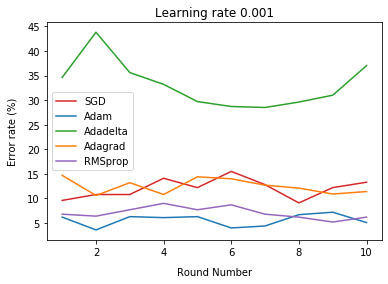

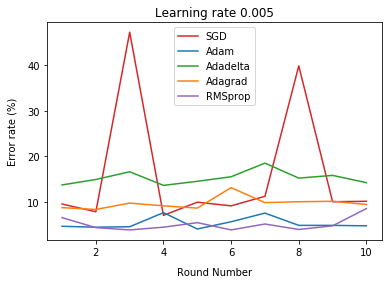

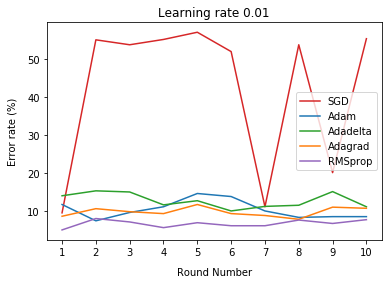

Mean error rate for lr=0.001 : 
- SGD : 12.040
- Adam : 5.590
- Adadelta : 33.170
- Adagrad : 12.480
- RMSprop : 7.070
Mean error rate for lr=0.005 : 
- SGD : 16.180
- Adam : 5.250
- Adadelta : 15.250
- Adagrad : 9.680
- RMSprop : 5.040
Mean error rate for lr=0.01 : 
- SGD : 42.310
- Adam : 10.350
- Adadelta : 12.750
- Adagrad : 9.760
- RMSprop : 6.680


In [6]:
torch.manual_seed(0)

# Setting the number of rounds, optimizers and parameters to test
nb_rounds = 10
nb_param = 3
nb_optim = 5

# Setting the list of learning rates to test
learning_rates = [0.001, 0.005, 0.01]

# Setting the hyperparameters
criterion = nn.CrossEntropyLoss()
mini_batch_size = 25
nb_epochs = 100

# Creating the 2D tensor of recorded error rates
test_errors = torch.zeros(nb_optim, nb_param, nb_rounds)

# Setting x-axis and y-axis of the first plot
fig1 = plt.figure()
sub_plt1 = fig1.add_subplot(1, 1, 1)
sub_plt1.set_xlabel('Round Number', labelpad=10)
sub_plt1.set_ylabel('Error rate (%)', labelpad=10)
sub_plt1.set_yscale('linear')
sub_plt1.set_title('Learning rate 0.001')

# Setting x-axis and y-axis of the second plot
fig2 = plt.figure()
sub_plt2 = fig2.add_subplot(1, 1, 1)
sub_plt2.set_xlabel('Round Number', labelpad=10)
sub_plt2.set_ylabel('Error rate (%)', labelpad=10)
sub_plt2.set_yscale('linear')
sub_plt2.set_title('Learning rate 0.005')

# Setting x-axis and y-axis of the third plot
fig3 = plt.figure()
sub_plt3 = fig3.add_subplot(1, 1, 1)
sub_plt3.set_xlabel('Round Number', labelpad=10)
sub_plt3.set_ylabel('Error rate (%)', labelpad=10)
sub_plt3.set_yscale('linear')
sub_plt3.set_title('Learning rate 0.01')

# Starting Mini Grid Search
for k in range(nb_param):
    
    # Setting the current learning rate
    lr = learning_rates[k]
    
    # Executing Next Round
    for j in range(nb_rounds):

        print('Starting round {:d} for learning rate {:.03f}'.format(j + 1, lr))

        # Generate train and test data sets with 1000 samples
        nb_samples = 1000
        train_input, train_target, train_classes, test_input, test_target, test_classes = prologue.generate_pair_sets(
            nb_samples)

        # Setting graph parameters
        graph_param = [
            (0, NetWSAL(), 'SGD'),
            (1, NetWSAL(), 'Adam'),
            (2, NetWSAL(), 'Adadelta'),
            (3, NetWSAL(), 'Adagrad'),
            (4, NetWSAL(), 'RMSprop'),
        ]

        # Loop to compute loss for each model
        for i, mod, name in graph_param:
            
            if name == 'SGD':
                print('Computing for SGD...')
                optimizer = optim.SGD(mod.parameters(), lr=lr)
                test_error = get_stats(mod, optimizer, criterion, mini_batch_size, nb_epochs,
                                       train_input, train_target, train_classes, test_input, test_target, test_classes)
                test_errors[i][k][j] = test_error
                
            elif name == 'Adam':
                print('Computing for Adam...')
                optimizer = optim.Adam(mod.parameters(), lr=lr)
                test_error = get_stats(mod, optimizer, criterion, mini_batch_size, nb_epochs,
                                       train_input, train_target, train_classes, test_input, test_target, test_classes)
                test_errors[i][k][j] = test_error
                
            elif name == 'Adadelta':
                print('Computing for Adadelta...')
                optimizer = optim.Adadelta(mod.parameters(), lr=lr)
                test_error = get_stats(mod, optimizer, criterion, mini_batch_size, nb_epochs,
                                       train_input, train_target, train_classes, test_input, test_target, test_classes)
                test_errors[i][k][j] = test_error
                
            elif name == 'Adagrad':
                print('Computing for Adagrad...')
                optimizer = optim.Adagrad(mod.parameters(), lr=lr)
                test_error = get_stats(mod, optimizer, criterion, mini_batch_size, nb_epochs,
                                       train_input, train_target, train_classes, test_input, test_target, test_classes)
                test_errors[i][k][j] = test_error
                
            elif name == 'RMSprop':
                print('Computing for RMSprop...')
                optimizer = optim.RMSprop(mod.parameters(), lr=lr)
                test_error = get_stats(mod, optimizer, criterion, mini_batch_size, nb_epochs,
                                       train_input, train_target, train_classes, test_input, test_target, test_classes)
                test_errors[i][k][j] = test_error

        print('Round {:d} for learning rate {:.03f} done'.format(j + 1, lr))

# Setting colors and labels
colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange', 'tab:purple']
labels = ['SGD', 'Adam', 'Adadelta', 'Adagrad', 'RMSprop']

# Plotting accuracy
for i in range(nb_optim):
    sub_plt1.plot(range(1, nb_rounds + 1), test_errors[i][0], color=colors[i], label=labels[i])
    sub_plt2.plot(range(1, nb_rounds + 1), test_errors[i][1], color=colors[i], label=labels[i])
    sub_plt3.plot(range(1, nb_rounds + 1), test_errors[i][2], color=colors[i], label=labels[i])

# Including legend to the plots
sub_plt1.legend()
sub_plt2.legend()
sub_plt3.legend()

# Formatting x-axis and displaying plot
plt.xticks(range(1, nb_rounds + 1))
plt.show()

for j in range(nb_param):
    print('Mean error rate for lr=' + str(learning_rates[j]) + ' : ')
    for i in range(nb_optim):
        print('- ' + str(labels[i]) + ' : ' + '{:.03f}'.format(test_errors[i][j].mean(0)))